# Data Analysis of World CO2 Emissions (1750-2020)

### The goal of this project is to analyze the dataset from https://ourworldindata.org/co2-emissions and see which countries contribute the most to global CO2 emissions over time.  According to the Environmental Protection Agency, human activities are responsible for almost all of the increase in greenhouse gases in the atmosphere over the last 150 years. The largest source of greenhouse gas emissions from human activities in the United States is from burning fossil fuels for electricity, heat, and transportation. In this analysis, we will first look through the data and get a basic outlook on emissions over time, and later look at how the US compares to the rest of the world. 

In [227]:
import pandas as pd
import matplotlib.pyplot as plt


### Project requirement 1.) Read in data. 
Feature: Read in data from a local csv.

In [228]:
df= pd.read_csv("co2.csv")
df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km�
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km�
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km�
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km�
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km�
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km�
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km�
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km�
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km�


## Project requirement 2.) Manipulate and clean your data.
Feature: Use built-in pandas or numpy functions to do things to data

### Check for missing values

In [229]:
df[df.isnull()].count() 

Country                0
Code                   0
Calling Code           0
Year                   0
CO2 emission (Tons)    0
Population(2022)       0
Area                   0
% of World             0
Density(km2)           0
dtype: int64

No missing values in dataset

### Check for duplicate values

In [230]:
df[df.duplicated()].count() 

Country                0
Code                   0
Calling Code           0
Year                   0
CO2 emission (Tons)    0
Population(2022)       0
Area                   0
% of World             0
Density(km2)           0
dtype: int64

There are no duplicate values

### Check for NaN values

In [231]:
df.isnull().values.any()

True

In [232]:
df.isnull().sum().sum()

27371

### Dropping NaN values

In [233]:
df.dropna(inplace=True)
df.isnull().values.any()

False

### Data description

In [234]:
df.describe()

,Year,CO2 emission (Tons),Population(2022),Area
count,48509.000000,4.850900e+04,4.850900e+04,4.850900e+04
mean,1885.000000,1.160748e+09,4.186199e+07,6.328071e+05
std,78.231235,1.125903e+10,1.545682e+08,1.551563e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,2.305825e+06,2.633800e+04
50%,1885.000000,0.000000e+00,9.038309e+06,1.303730e+05
75%,1953.000000,1.660158e+07,3.054758e+07,5.516950e+05
max,2020.000000,4.170000e+11,1.425887e+09,9.984670e+06


### Using pandas built-in function to print a concise summary of this DataFrame

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48509 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              48509 non-null  object 
 1   Code                 48509 non-null  object 
 2   Calling Code         48509 non-null  object 
 3   Year                 48509 non-null  int64  
 4   CO2 emission (Tons)  48509 non-null  float64
 5   Population(2022)     48509 non-null  float64
 6   Area                 48509 non-null  float64
 7   % of World           48509 non-null  object 
 8   Density(km2)         48509 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.7+ MB


### Changing C02 Emissions (Tons) from dtype float to int64

In [251]:
df['CO2 emission (Tons)'] = df['CO2 emission (Tons)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48509 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              48509 non-null  object 
 1   Code                 48509 non-null  object 
 2   Calling Code         48509 non-null  object 
 3   Year                 48509 non-null  int64  
 4   CO2 emission (Tons)  48509 non-null  int64  
 5   Population(2022)     48509 non-null  float64
 6   Area                 48509 non-null  float64
 7   % of World           48509 non-null  object 
 8   Density(km2)         48509 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.7+ MB


### Removing unicode charachter from "Density(km/2)" column

In [237]:
df['Density(km2)'] = df['Density(km2)'].str.encode('ascii', 'ignore').str.decode('ascii')
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0,41128771.0,652230.0,0.40%,63/km
1,Afghanistan,AF,93,1751,0,41128771.0,652230.0,0.40%,63/km
2,Afghanistan,AF,93,1752,0,41128771.0,652230.0,0.40%,63/km
3,Afghanistan,AF,93,1753,0,41128771.0,652230.0,0.40%,63/km
4,Afghanistan,AF,93,1754,0,41128771.0,652230.0,0.40%,63/km


## Project Requirement 3.) Analyze your data.

### How many countries are in the dataset?

In [238]:
countries = df.loc[:, 'Country'][df['Year']==2020]
len(countries)

179

There are 220 countries in this dataset

### Checking the Population of 2020

In [239]:
pop_2020= df[df['Year']==2020]
pop_2020.loc[:,'Population(2022)'].sum().astype(int)

7493296127

The total population of the world in 2020 was approximately 7.8 billion people according to this dataset

### Total CO2 Emission for all countries in 2020

In [240]:
total_co2 = pop_2020['CO2 emission (Tons)'].sum()
total_co2

1492795620007

Total C02 emissions for the world in 2020 was 1,654,087,724,978 tons.

## 4.) Visualize you data with plots.

### Identifying years of significant increase in CO2 Emissions worldwide

Text(0, 0.5, 'CO2 emission (Tons)')

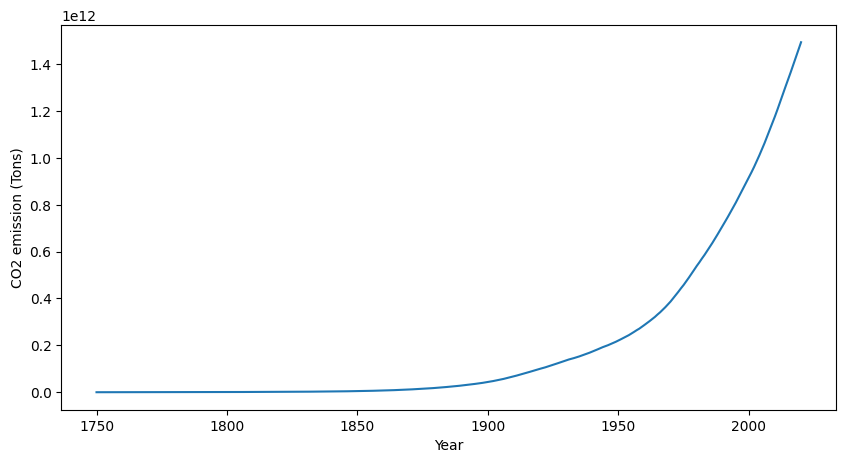

In [241]:
df.groupby('Year')['CO2 emission (Tons)'].sum().plot(figsize=(10,5));
plt.ylabel('CO2 emission (Tons)')

We can see an increase in CO2 Emissions around 1900, and a sharp increase after 1950. Industrialization, technological innovation and population increase are possible explanations for the rise. We should consider data was less reliable or non-existant as we go back in time before ther 20th century. Even with an incomplete dataset, the exponential rise in emissions over the past century is significant.

### Sorting the top 30 countries by total emissions in 2020

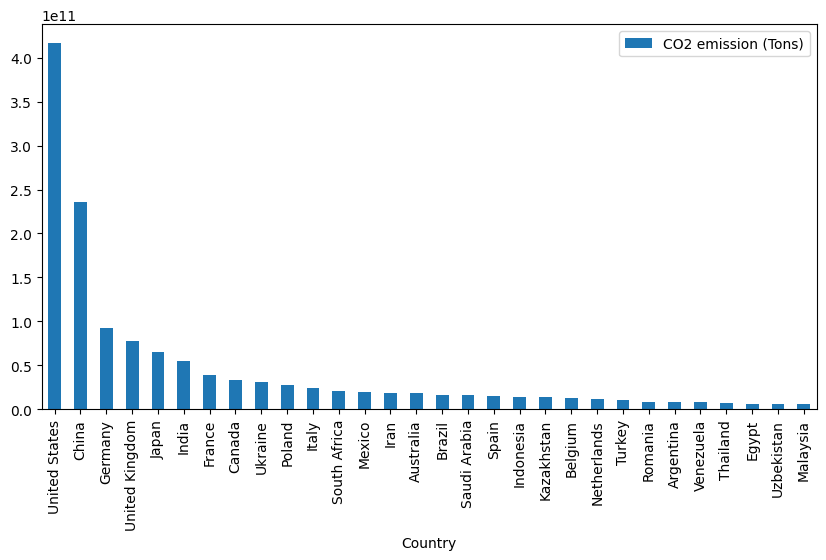

In [242]:
df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(30).plot.bar(x='Country',y='CO2 emission (Tons)',figsize=(10,5));

### Finding the top five countries by CO2 emissions in 2020

In [243]:
top_five = df[df['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(5)
top_five

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
57180,United States,US,1,2020,417000000000,3.382899e+08,9372610.0,6.10%,36/km
10839,China,CN,86,2020,236000000000,1.425887e+09,9706961.0,6.30%,147/km
20324,Germany,DE,49,2020,92635615097,8.336984e+07,357114.0,0.20%,233/km
56909,United Kingdom,GB,44,2020,78161145636,6.750894e+07,242900.0,0.20%,278/km
26557,Japan,JP,81,2020,65625166916,1.239517e+08,377930.0,0.20%,328/km


### How much CO2 does the top five emitters produce?

In [244]:
top_five_co2 = top_five['CO2 emission (Tons)'].sum()
top_five_co2

889421927649

### The top five emmiters produce 938,796,760,733 tons of CO2

How much CO2 does the rest of the world produce in 2020?

In [245]:
total_co2 - top_five_co2

603373692358

### The rest of the world produces 715,290,964,245 tons of CO2 in 2020

What percent of the world's CO2 is produced my the top five countries?

In [246]:
(top_five_co2 / total_co2) * 100

59.5809577499182

### The top five countries produce 56% of the world's CO2! 

Looking at top 30 countries by population

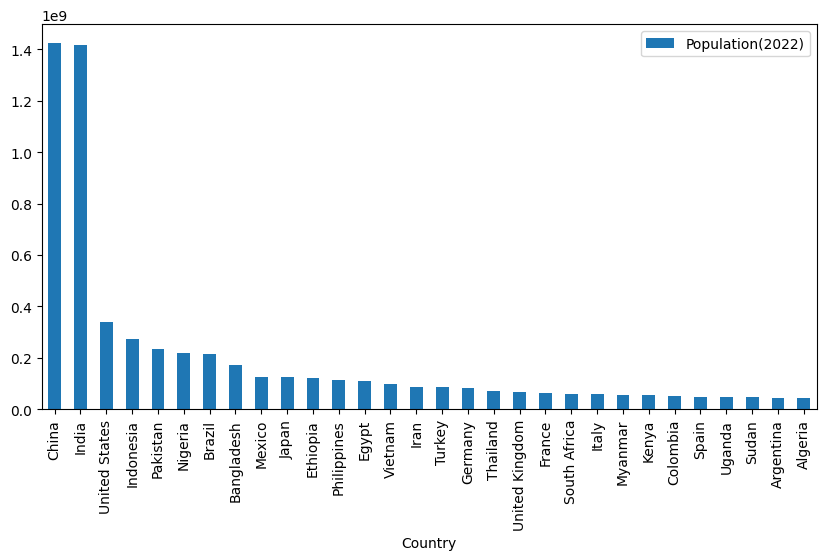

In [247]:
df[df['Year']==2020].sort_values(by='Population(2022)', ascending=False).head(30).plot.bar(x='Country',y='Population(2022)',figsize=(10,5));

## Comparision between US and World CO2 Emissions (1750-2020)

Creating a DataFrame for the United States

In [248]:
usa_data = df.loc[df['Country'] == 'United States']
usa_data

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
56910,United States,US,1,1750,0,338289857.0,9372610.0,6.10%,36/km
56911,United States,US,1,1751,0,338289857.0,9372610.0,6.10%,36/km
56912,United States,US,1,1752,0,338289857.0,9372610.0,6.10%,36/km
56913,United States,US,1,1753,0,338289857.0,9372610.0,6.10%,36/km
56914,United States,US,1,1754,0,338289857.0,9372610.0,6.10%,36/km
...,...,...,...,...,...,...,...,...,...
57176,United States,US,1,2016,396000000000,338289857.0,9372610.0,6.10%,36/km
57177,United States,US,1,2017,401000000000,338289857.0,9372610.0,6.10%,36/km
57178,United States,US,1,2018,407000000000,338289857.0,9372610.0,6.10%,36/km
57179,United States,US,1,2019,412000000000,338289857.0,9372610.0,6.10%,36/km


Creating a DataFrame for the rest of the world, minus the United States

In [249]:
rest_of_world = df.loc[df['Country'] != 'United States']
rest_of_world

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0,41128771.0,652230.0,0.40%,63/km
1,Afghanistan,AF,93,1751,0,41128771.0,652230.0,0.40%,63/km
2,Afghanistan,AF,93,1752,0,41128771.0,652230.0,0.40%,63/km
3,Afghanistan,AF,93,1753,0,41128771.0,652230.0,0.40%,63/km
4,Afghanistan,AF,93,1754,0,41128771.0,652230.0,0.40%,63/km
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042,16320537.0,390757.0,0.30%,42/km
59616,Zimbabwe,ZW,263,2017,746048675,16320537.0,390757.0,0.30%,42/km
59617,Zimbabwe,ZW,263,2018,757903042,16320537.0,390757.0,0.30%,42/km
59618,Zimbabwe,ZW,263,2019,768852126,16320537.0,390757.0,0.30%,42/km


Comparing the two DataFrames in a plot

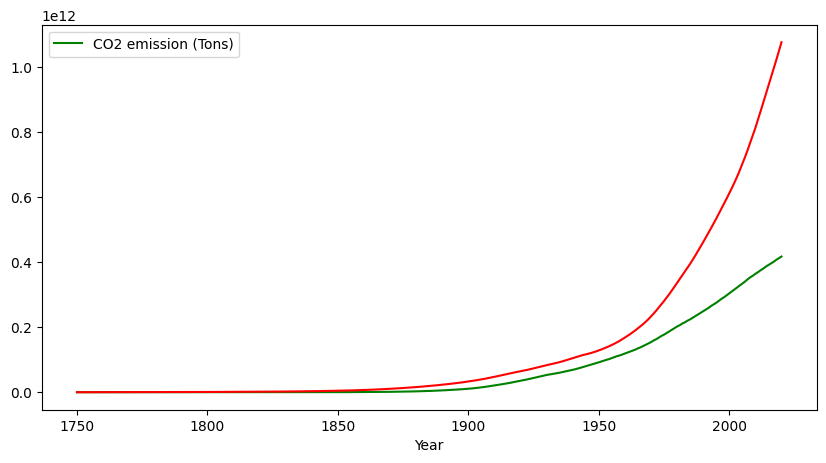

In [250]:
usa_data.plot(x = 'Year', y = 'CO2 emission (Tons)',figsize=(10,5), color = 'green');
rest_of_world.groupby('Year')['CO2 emission (Tons)'].sum().plot(figsize=(10,5), color = 'red');



We can see the United States contributes significantly to the global CO2 output. However, in recent decades the rest of the world rate of increase is growing exponentially.